In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [28]:
data_mnist = pd.read_csv('mnist.csv', header=None)
data_mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
data_mnist.shape

(500, 785)

In [30]:
pca = PCA(n_components=2)
data_mnist_transformed = pca.fit_transform(data_mnist)

In [31]:
n_clusters = list(range(1, 10))
distortians = []

for n in n_clusters:
    km = KMeans(n_clusters=n, init='k-means++', random_state=42, n_init='auto', max_iter=100)
    km.fit(data_mnist_transformed)
    distortians.append(km.inertia_)

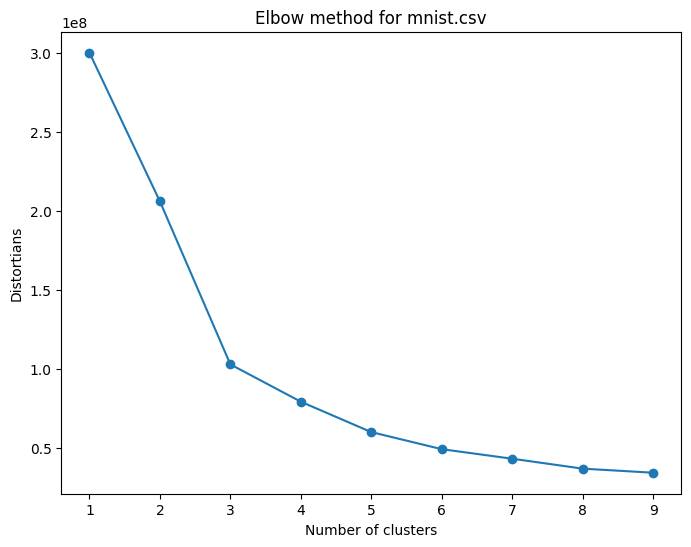

In [32]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
ax.plot(n_clusters, distortians, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortians')
plt.title('Elbow method for mnist.csv')
plt.show()

In [33]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(data_mnist_transformed)

labels = kmeans.labels_
inertia = kmeans.inertia_
clusters = kmeans.cluster_centers_

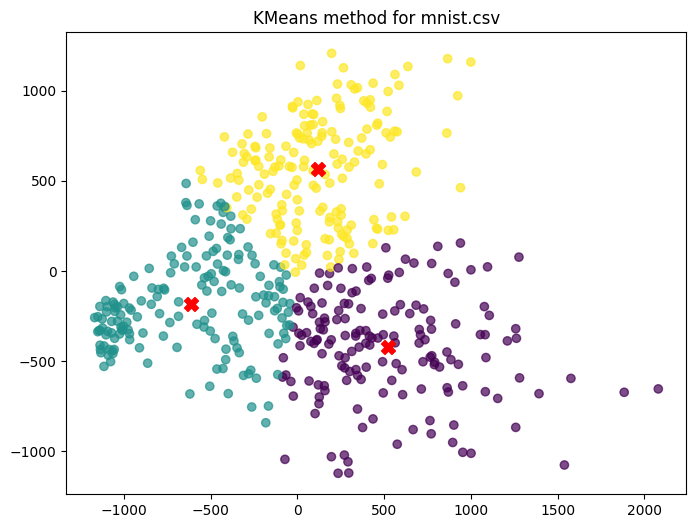

In [34]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
ax.scatter(data_mnist_transformed[:,0], data_mnist_transformed[:,1], c=labels, alpha=0.7)
ax.scatter(clusters[:,0], clusters[:,1], c='r', marker='X', s=100)
plt.title('KMeans method for mnist.csv')
plt.show()